**Генерирање на 50000 noise samples**

In [1]:
! pip install -q 'lalsuite==7.11' 'PyCBC==2.0.5'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 39.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.2/201.2 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 4.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/

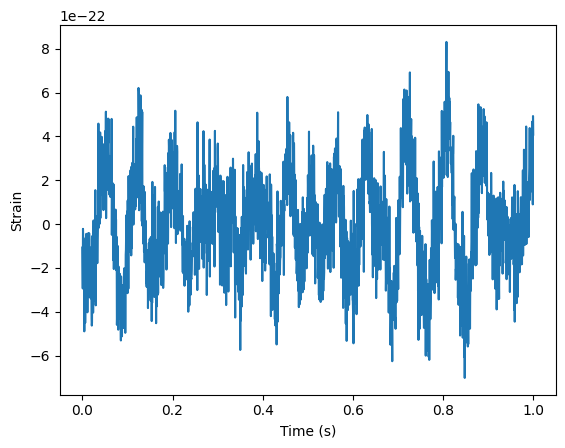

In [2]:
import matplotlib.pyplot as pp
import pycbc.noise
import pycbc.psd
import numpy as np


num_samples = 50000  # broj na primeroci
duration = 1.0  # traenje na primerokot 1s
sampling_rate = 2048  # sampling freq. 2kHz
seeds = np.arange(num_samples)  # niza od razlichni seeds za generiranje na razlichni shumovi - vrednosti na strain

# niza vo koja kje se chuvaat primerocite
noise_samples = []


for seed in seeds:

    flow = 10.0 + (seed % 6) * 5.0  # f lower od 10 30 Hz so chekor 5
    delta_f = 1.0 / 16  # delta_f --> inverzna vrednost od vremetraenjeto na frequency bin za PSD (16 Hz)

    flen = int(sampling_rate / delta_f) + 1
    psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)

    # generiranje na primerocite so soodv. funkcija
    delta_t = 1.0 / sampling_rate
    tsamples = int(duration / delta_t)
    ts = pycbc.noise.noise_from_psd(tsamples, delta_t, psd, seed=seed)

    noise_samples.append(ts)


pp.plot(noise_samples[0].sample_times, noise_samples[0])
pp.ylabel('Strain')
pp.xlabel('Time (s)')
pp.show()

In [3]:
print(len(noise_samples))

50000


In [4]:
import os
import numpy as np
import zipfile
from google.colab import files

In [17]:
import os
import numpy as np

output_dir = 'noise_samples'
os.makedirs(output_dir, exist_ok=True)

file_paths = []
labels = []

for i, noise_sample in enumerate(noise_samples):

    folder_name = f'Noise{i + 1}'
    folder_path = os.path.join(output_dir, folder_name)
    os.makedirs(folder_path, exist_ok=True)

    # zachuvuvanje na sekoj primerok kako npy file
    file_path = os.path.join(folder_path, f'noise{i + 1}.npy')
    np.save(file_path, noise_sample)

    file_paths.append(file_path)
    labels.append('Noise')

label_array = np.column_stack((file_paths, labels))

# zachuvuvanje na labelite za sekoj primerok kako npy file
label_file_path = os.path.join(output_dir, 'labels.npy')
np.save(label_file_path, label_array)


In [19]:
zip_file_path = 'noise_samples.zip'
with zipfile.ZipFile(zip_file_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for file_path in file_paths:
        zipf.write(file_path)


files.download(zip_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
import numpy as np
import pandas as pd

labels_array = np.load('noise_samples/labels.npy')

labels_df = pd.DataFrame(labels_array, columns=['Path','Label'])

print(labels_df.head())


                              Path  Label
0  noise_samples/Noise1/noise1.npy  Noise
1  noise_samples/Noise2/noise2.npy  Noise
2  noise_samples/Noise3/noise3.npy  Noise
3  noise_samples/Noise4/noise4.npy  Noise
4  noise_samples/Noise5/noise5.npy  Noise
